In [1]:
import pandas as pd

In [2]:
online_retail = pd.read_excel('/home/awantik/Downloads/Online Retail.xlsx')

In [3]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Understanding the data
* We will try to understand what each column means
* InvoiceNo - The bill number, products which are bought together have same invoice number
* StockCode - It's unique product id
* Description - Information about the product
* Quantity - Number of times in a bill that item was purchased
* InvoiceDate - Date in which purchase was done
* UnitPrice - Price of each item
* CustomerId - Unique identifier of customer
* Country - Where the purchase is happening

In [6]:
online_retail.StockCode.value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
84839        1
35644        1
35594        1
85018B       1
21268        1
Name: StockCode, Length: 4070, dtype: int64

In [8]:
online_retail[online_retail.StockCode == '85123A'].count()

InvoiceNo      2313
StockCode      2313
Description    2313
Quantity       2313
InvoiceDate    2313
UnitPrice      2313
CustomerID     2077
Country        2313
dtype: int64

### Stage 1 : Questions based on this data
1. How many unique billing was made?
2. How many total customers are there?
3. Which day of the week most sale was done?
4. What is the most popular product?
5. In which country should you open more stores?

6. Bonus Question - Plot sales for top 5 products 

#### 1. How many unique billing was made?

In [13]:
online_retail.InvoiceNo.unique().size

25900

#### 2. How many total customers are there?

In [14]:
online_retail.CustomerID.unique().size 

4373

#### 3. Which day of the week most sale was done? 

In [15]:
online_retail['day_of_week'] = online_retail.InvoiceDate.map(lambda d : pd.Timestamp(d).day_name()) 

In [16]:
online_retail.groupby('day_of_week').Quantity.sum()

day_of_week
Friday        794440
Monday        815354
Sunday        467732
Thursday     1167823
Tuesday       961543
Wednesday     969558
Name: Quantity, dtype: int64

In [18]:
#incorrect
online_retail.day_of_week.value_counts() 

Thursday     103857
Tuesday      101808
Monday        95111
Wednesday     94565
Friday        82193
Sunday        64375
Name: day_of_week, dtype: int64

In [48]:
online_retail['total_cost'] = online_retail.UnitPrice * online_retail.Quantity
online_retail.groupby('day_of_week').total_cost.sum().sort_values(ascending=False)

day_of_week
Thursday     2112519.000
Tuesday      1966182.791
Wednesday    1734147.010
Monday       1588609.431
Friday       1540610.811
Sunday        805678.891
Name: total_cost, dtype: float64

#### 4. What is the most popular product?

In [25]:
top_selling_product = online_retail.groupby('StockCode').Quantity.sum().sort_values(ascending=False)[:5]

In [49]:
top_selling_product

StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
Name: Quantity, dtype: int64

In [24]:
#negative show sales done in credit
online_retail.groupby('StockCode').Quantity.sum().sort_values(ascending=True)[:5]

StockCode
23005     -14418
23003      -8516
72140F     -5368
79323W     -4838
79323LP    -2618
Name: Quantity, dtype: int64

In [32]:
top_selling_prods = list(top_selling_product.index)

In [34]:
top_selling_product

StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
Name: Quantity, dtype: int64

In [40]:
for prod in top_selling_prods:
    print(online_retail[online_retail.StockCode == prod].Description.unique())

['SMALL POPCORN HOLDER' 'POPCORN HOLDER']
['WORLD WAR 2 GLIDERS ASSTD DESIGNS']
['JUMBO BAG RED RETROSPOT']
['WHITE HANGING HEART T-LIGHT HOLDER' '?' 'wrongly marked carton 22804'
 'CREAM HANGING HEART T-LIGHT HOLDER']
['ASSORTED COLOUR BIRD ORNAMENT' 'damaged']


#### 5. In which country should you open more stores?

In [42]:
online_retail['total_cost'] = online_retail.UnitPrice * online_retail.Quantity

In [45]:
online_retail.groupby('Country').total_cost.sum().sort_values(ascending=False)[:5]

Country
United Kingdom    8.187806e+06
Netherlands       2.846615e+05
EIRE              2.632768e+05
Germany           2.216982e+05
France            1.974039e+05
Name: total_cost, dtype: float64

#### 6. Plotting top selling products

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

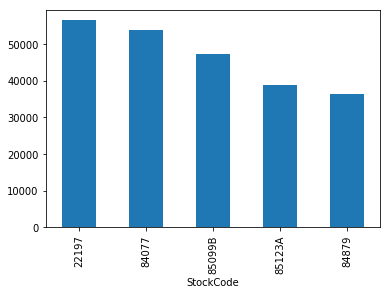

In [54]:
top_selling_product.plot.bar()

In [55]:
index = ['POPCORN HOLDER','GLIDERS ASSTD DESIGNS','JUMBO BAG','T-LIGHT HOLDER','BIRD ORNAMENT']

In [56]:
top_selling_product.index = index

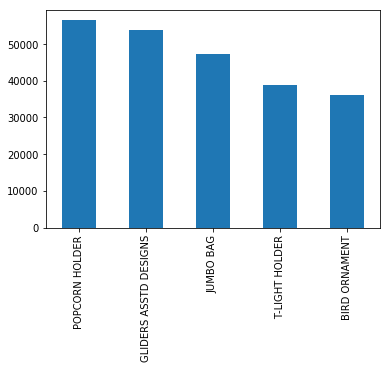

In [57]:
top_selling_product.plot.bar()

#### Stage 2 Questions
1. Relation between country-weekday & revenue (pivot_table)
2. Identify best week of based on the data (rolling (reading activity))
3. Find the richest person
4. What can you tell about spending capacity of the countries?